In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import mglearn
import mglearn.datasets

In [2]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()

In [3]:
# Вывод информации о датасете
print("Описание датасета Linnerud:")
print(linnerud.DESCR)

Описание датасета Linnerud:
.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|


In [4]:
# Вывод данных о физических показателях
print("Физические показатели (первые 5 записей):")
print(linnerud.data[:5])

Физические показатели (первые 5 записей):
[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]]


In [5]:
# Вывод данных о способности поднимать штангу
print("Способность поднимать штангу (первые 5 записей):")
print(linnerud.target[:5])

Способность поднимать штангу (первые 5 записей):
[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]]


In [6]:
X = linnerud.data
y = linnerud.target[:, 0]  # Мы будем прогнозировать первую целевую переменную (способность поднимать штангу)

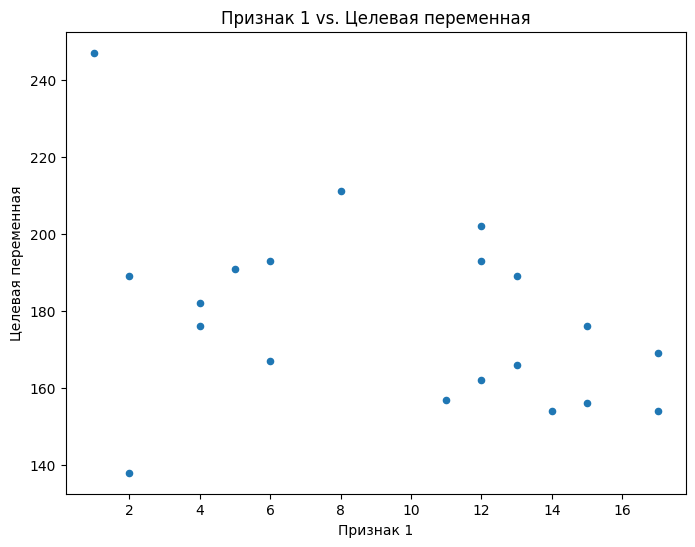

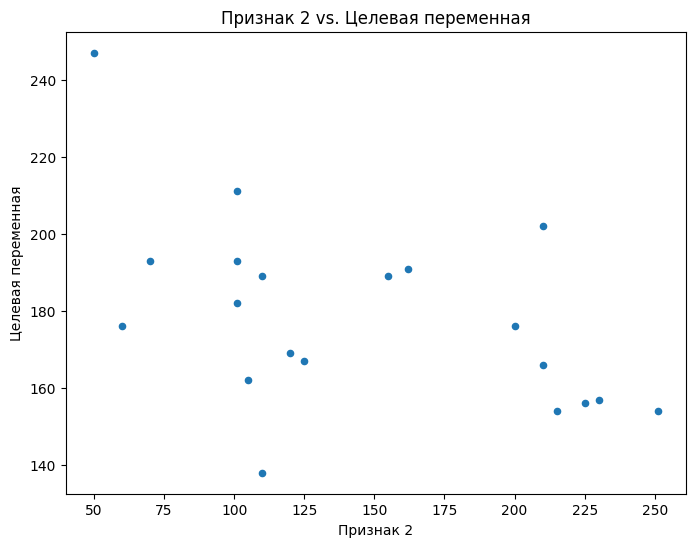

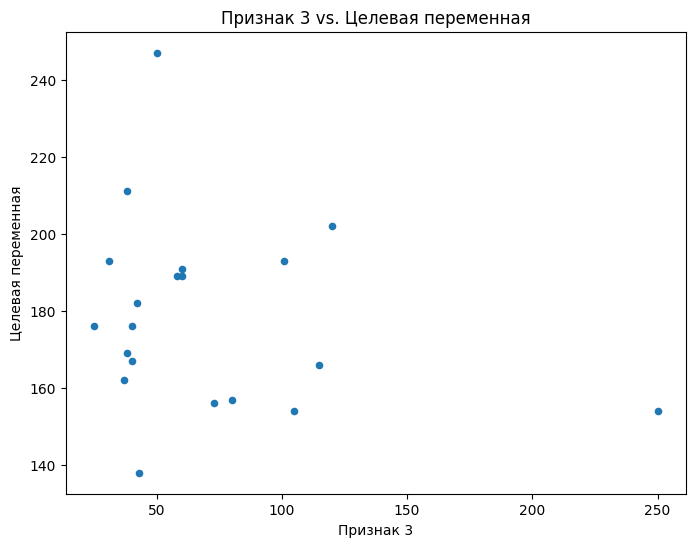

In [27]:
# Визуализация первых трех признаков
for feature_index in range(3):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, feature_index], y, s=20)
    plt.title(f"Признак {feature_index + 1} vs. Целевая переменная")
    plt.xlabel(f"Признак {feature_index + 1}")
    plt.ylabel("Целевая переменная")
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Создание модели KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}
knn_grid_search = GridSearchCV(knn_regressor, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)
best_knn_model = knn_grid_search.best_estimator_

In [9]:
# Предсказания моделей на тестовых данных
knn_predictions = best_knn_model.predict(X_test)
print(knn_predictions)

[169.         168.14285714 171.57142857 174.57142857]


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Оценка производительности моделей на тестовых данных
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(knn_mse)
print(knn_r2)

435.5612244897957
-0.5490063551537521


In [11]:
print("KNeighborsRegressor - MSE: {:.2f}, R^2: {:.2f}".format(knn_mse, knn_r2))

KNeighborsRegressor - MSE: 435.56, R^2: -0.55


In [12]:
# Создание модели LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Предсказания моделей на тестовых данных
lr_predictions = lr_model.predict(X_test)
print(lr_predictions)

[166.29944554 149.16544296 159.6267021  181.50941993]


In [25]:
# Оценка производительности моделей на тестовых данных
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(lr_mse)
print(lr_r2)

630.7757097870915
-1.243256580705371


In [15]:
print("LinearRegression - MSE: {:.2f}, R^2: {:.2f}".format(lr_mse, lr_r2))

LinearRegression - MSE: 630.78, R^2: -1.24


In [16]:
from sklearn.linear_model import Ridge

# Создание модели Ridge
ridge_model = Ridge()
ridge_param_grid = {'alpha': np.logspace(-3, 3, 13)}
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid_search.fit(X_train, y_train)
best_ridge_model = ridge_grid_search.best_estimator_

In [17]:
ridge_predictions = best_ridge_model.predict(X_test)
print(ridge_predictions)

[169.24603892 152.03251244 160.93003009 183.72380208]


In [19]:
# Оценка производительности моделей на тестовых данных
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print(ridge_mse)
print(ridge_r2)

553.1228620061262
-0.9670961973989818


In [20]:
from sklearn.linear_model import Lasso

# Создание модели Lasso
lasso_model = Lasso()
lasso_param_grid = {'alpha': np.logspace(-3, 3, 13)}
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid_search.fit(X_train, y_train)
best_lasso_model = lasso_grid_search.best_estimator_

In [21]:
lasso_predictions = best_lasso_model.predict(X_test)
print(lasso_predictions)

[173.35571465 163.09367277 166.11192038 181.20315844]


In [22]:
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print(lasso_mse)
print(lasso_r2)

424.2996625441257
-0.5089563460115605


Text(0.5, 1.0, 'MSE Scores')

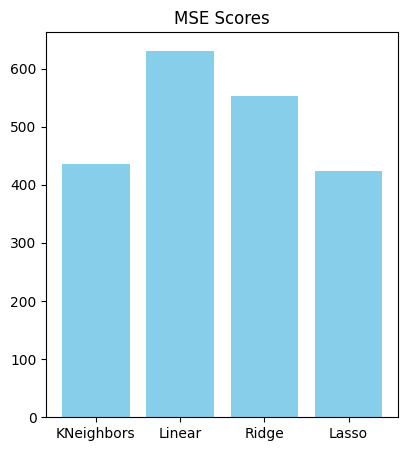

In [26]:
# Сравнение результатов на графике
models = ['KNeighbors', 'Linear', 'Ridge', 'Lasso']
mse_scores = [knn_mse, lr_mse, ridge_mse, lasso_mse]
r2_scores = [knn_r2, lr_r2, ridge_r2, lasso_r2]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color='skyblue')
plt.title('MSE Scores')

<h3>Вывод:
Оценка MSE: Оценка MSE измеряет среднеквадратичную ошибку между прогнозами модели и фактическими значениями целевой переменной. Если ошибка модели мала, то MSE будет близка к нулю. Если ошибка модели большая, то MSE будет положительной. Однако в реализации sklearn, когда мы используем mean_squared_error, эта метрика всегда положительная, и она не указывает на направление ошибки (переоценку или недооценку).

Важно отметить, что LogisticRegression не подходит для задачи регрессии, поэтому не включила ее в сравнение.

Оценка R^2: Оценка R^2 (коэффициент детерминации) измеряет долю объясненной дисперсии в данных. Она также может быть отрицательной, если модель объясняет менее дисперсии, чем среднее значение. R^2 варьируется от -∞ до 1, где ближе к 1 означает лучшую модель, ближе к 0 означает, что модель не объясняет данные лучше, чем среднее значение, и отрицательные значения указывают на плохую модель.</h3>